In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas
from phe import *
from phe import map_data as phe_map_data
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

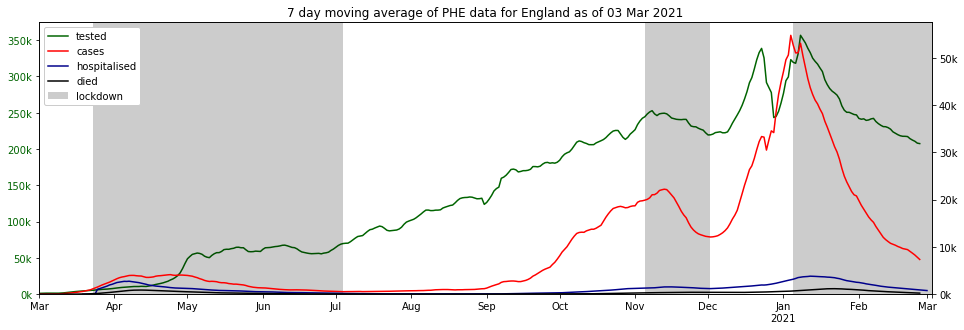

In [2]:
plot_summary(earliest_date='2020-03-01')

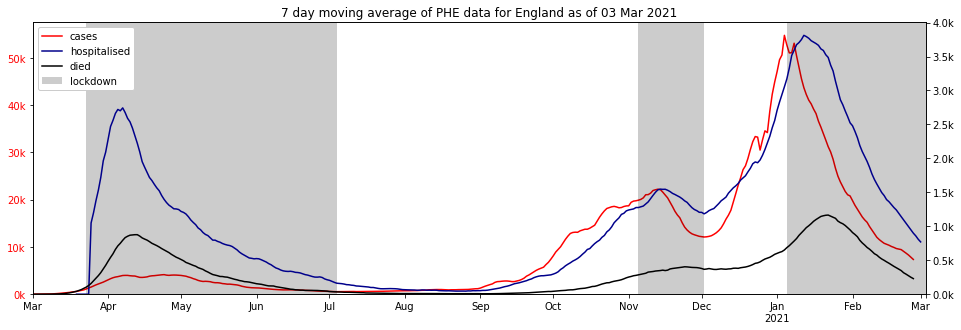

In [3]:
plot_summary(earliest_date='2020-03-01', left_series=(s.new_cases_sum,), 
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0k_formatter)

,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,640219.0,17554700.0,16914481.0,56286961,1.137420,30.050443,68.812138
1,Northern Ireland,N92000002,37862.0,545019.0,507157.0,1893667,1.999401,26.781741,71.218857
2,Scotland,S92000003,92550.0,1661879.0,1569329.0,5463300,1.694031,28.724928,69.581041
3,Wales,W92000004,124781.0,942017.0,817236.0,3152879,3.957684,25.920310,70.122006


'partial: 20,703,615, full: 895,412'

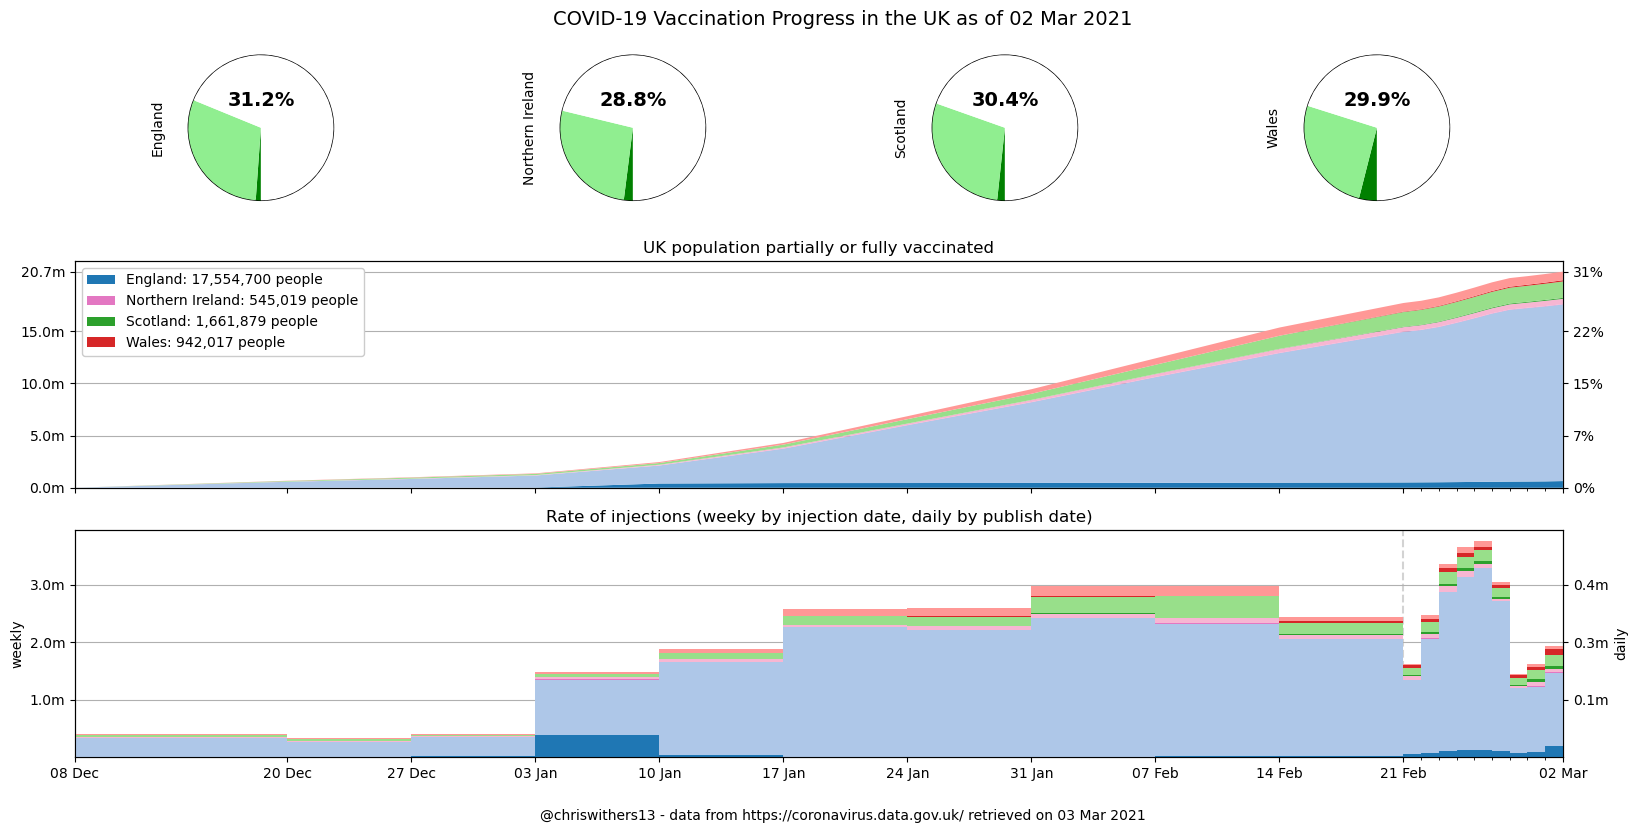

In [4]:
results = vaccination_dashboard(show_partial=True)
display(results, f"partial: {results['any'].sum():,.0f}, full: {results['full'].sum():,.0f}")

In [5]:
vaccination_changes()

,,First Dose (New),Second Dose (New),Complete (New),First Dose (Total),Second Dose (Total),Complete (Total)
,,,,,,,
England,02 Mar 21,"+181,316","+27,652","+27,652","+17,554,700","+640,219","+640,219"
Northern Ireland,02 Mar 21,"+7,630","+2,492","+2,492","+545,019","+37,862","+37,862"
Scotland,02 Mar 21,"+27,518","+8,105","+8,105","+1,661,879","+92,550","+92,550"
Wales,02 Mar 21,"+8,532","+13,065","+13,065","+942,017","+124,781","+124,781"


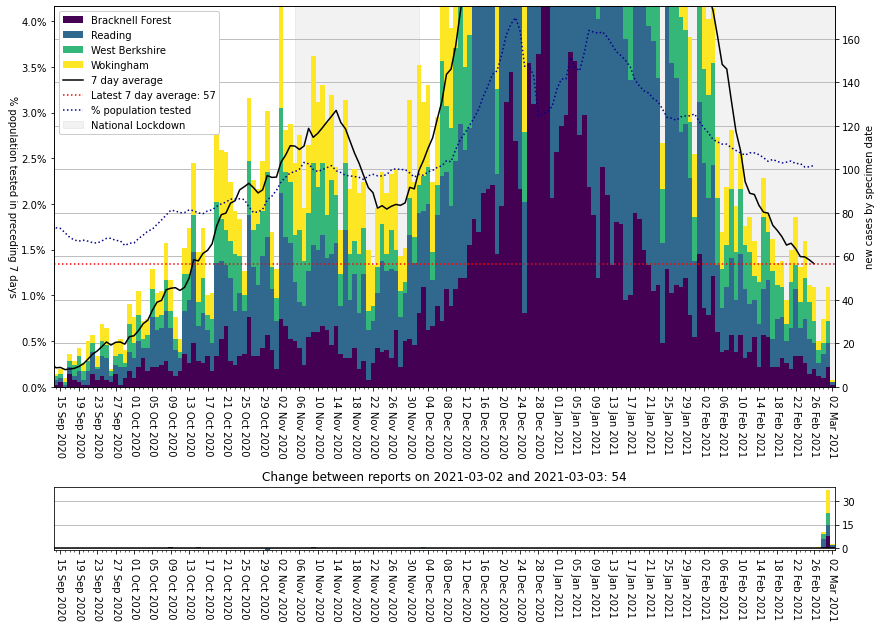

In [6]:
plot_areas(for_date, areas=my_areas, earliest='2020-09-14', ylim=175)

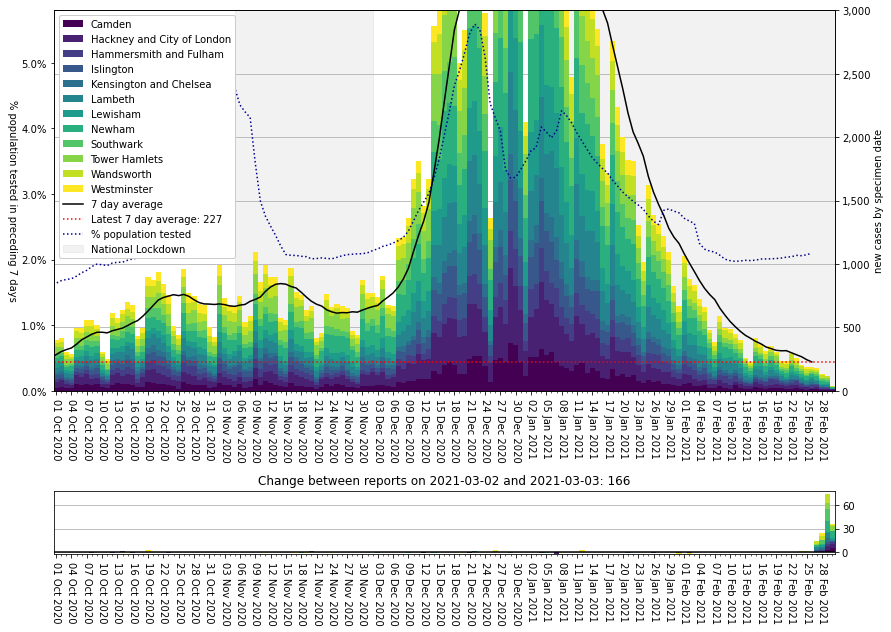

In [7]:
plot_areas(for_date, areas=london_areas, ylim=3_000)

In [8]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [9]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E07000150,Corby,148.162508,107.0,2021-03-02
S12000005,Clackmannanshire,143.577804,74.0,2021-03-02
E06000016,Leicester,140.024391,496.0,2021-03-02
E07000134,North West Leicestershire,138.016234,143.0,2021-03-02
E07000140,South Holland,137.867163,131.0,2021-03-02
E08000016,Barnsley,134.890993,333.0,2021-03-02
S12000014,Falkirk,131.767046,212.0,2021-03-02
E06000010,"Kingston upon Hull, City of",130.111095,338.0,2021-03-02
E07000123,Preston,125.056765,179.0,2021-03-02


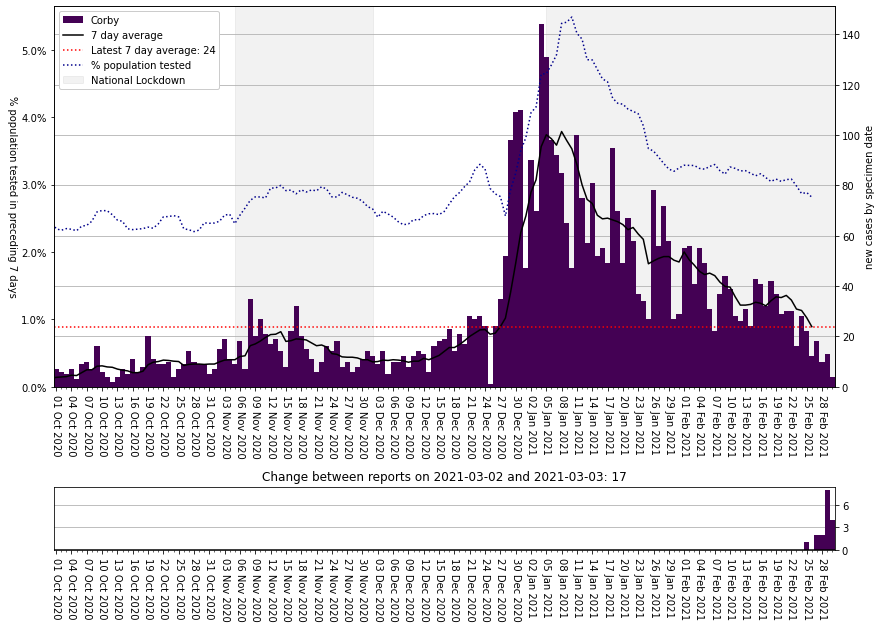

In [10]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [11]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000025,Birmingham,87.141886,995.0,2021-03-02
E08000035,Leeds,94.182735,747.0,2021-03-02
E08000032,Bradford,121.717157,657.0,2021-03-02
S12000049,Glasgow City,92.399545,585.0,2021-03-02
E06000016,Leicester,140.024391,496.0,2021-03-02
E06000047,County Durham,86.022479,456.0,2021-03-02
E08000019,Sheffield,77.626344,454.0,2021-03-02
E08000034,Kirklees,100.048433,440.0,2021-03-02
E08000003,Manchester,79.586440,440.0,2021-03-02


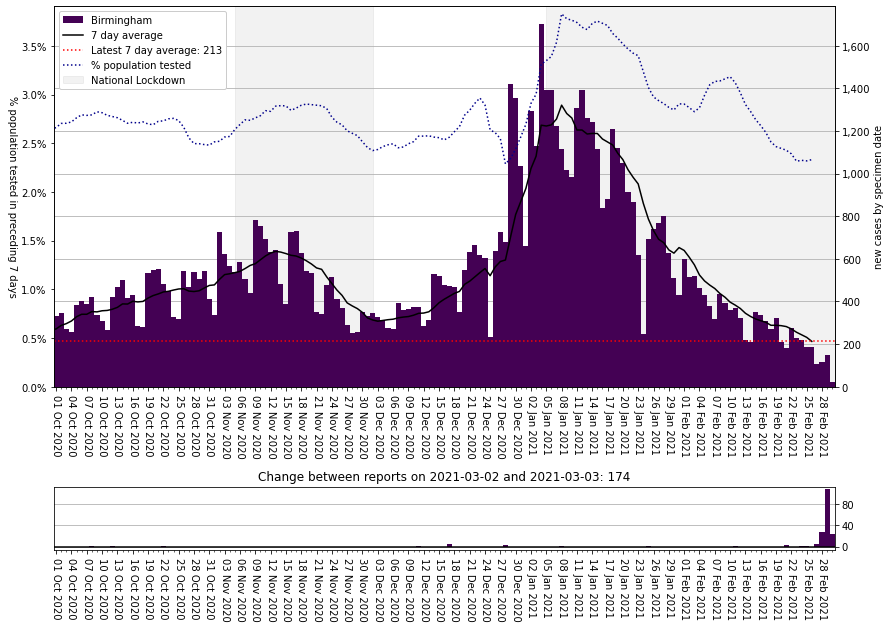

In [12]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [13]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)
zoe_max = 1.3
phe_max = 0.30

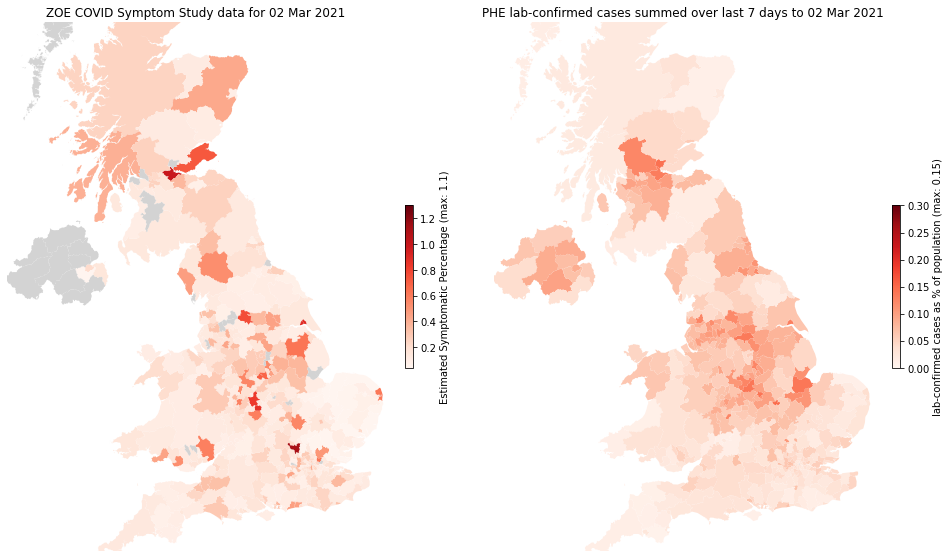

In [14]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

In [15]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

Loading BokehJS ...

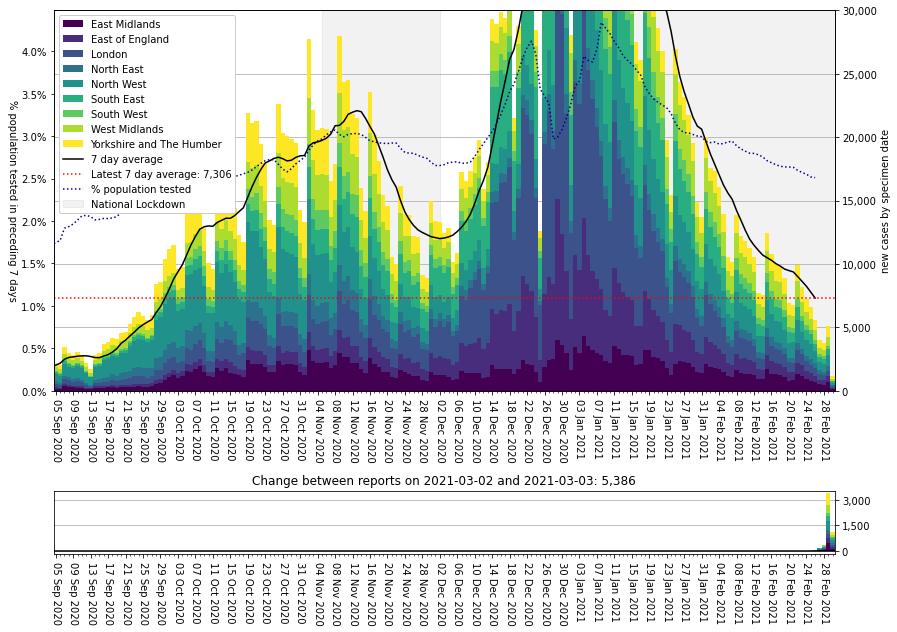

In [16]:
plot_areas(for_date, area_type=region, ylim=30_000, earliest='2020-09-05')

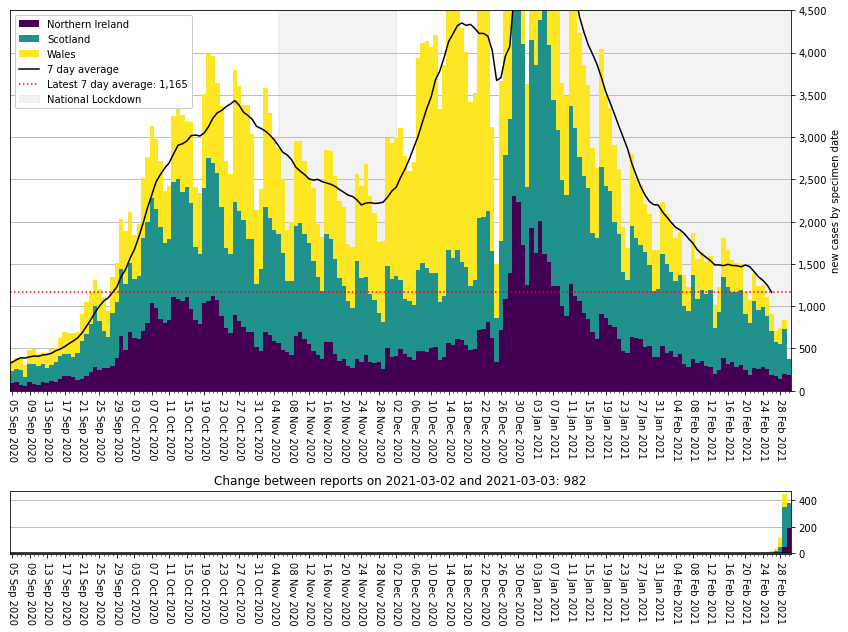

In [17]:
plot_areas(for_date, 'cases_devolved', ylim=4_500, diff_ylims=None, earliest='2020-09-05')